<h2>Data Wrangling</h2>

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
dataset = pd.read_csv("1000g.all",sep="\t")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
ENFJ                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [4]:
dataset.columns = ['MBTI','Gender','Tweet_num','Tweets']

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
MBTI         1499 non-null object
Gender       1499 non-null object
Tweet_num    1499 non-null int64
Tweets       1499 non-null object
dtypes: int64(1), object(3)
memory usage: 46.9+ KB


In [6]:
dataset.MBTI.value_counts()

INFJ    257
INTJ    193
INFP    175
ENFP    148
INTP    111
ENFJ    105
ENTJ    102
ISFJ     77
ISTJ     75
ENTP     70
ISFP     51
ESFJ     36
ESTJ     36
ESFP     26
ISTP     22
ESTP     15
Name: MBTI, dtype: int64

In [7]:
dataset_2000 = pd.read_csv("2000g.all",sep="\t")
dataset_2000.columns = ['MBTI','Gender','Tweet_num','Tweets']
dataset_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 4 columns):
MBTI         1499 non-null object
Gender       1499 non-null object
Tweet_num    1499 non-null int64
Tweets       1499 non-null object
dtypes: int64(1), object(3)
memory usage: 46.9+ KB


In [8]:
dataset_2000.head(5)

,MBTI,Gender,Tweet_num,Tweets
0,ENFJ,f,1606,say what ? this weekend has been full of surpr...
1,ENFJ,m,1810,daaamn ru was so mad .... @URL / cv9vzqrtjk da...
2,ENFJ,f,1855,"in all , i may have slept an uninterrupted 45 ..."
3,ENFJ,f,100,that tumblr post comparing louis ' laugh to a ...
4,ENFJ,f,1508,rt @USER : and those people are not the religi...


In [9]:
dataset.head(5)

,MBTI,Gender,Tweet_num,Tweets
0,ENFJ,f,998,say what ? this weekend has been full of surpr...
1,ENFJ,m,1000,daaamn ru was so mad .... @URL / cv9vzqrtjk da...
2,ENFJ,f,999,"in all , i may have slept an uninterrupted 45 ..."
3,ENFJ,f,100,that tumblr post comparing louis ' laugh to a ...
4,ENFJ,f,1000,rt @USER : and those people are not the religi...


In [10]:
meta_2000 = pd.read_csv("2000meta.all",sep="\t")
meta_2000.columns = ["followers_count","statuses_count","favorites_count","listed_count","profile_background_color"]

In [11]:
meta_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 5 columns):
followers_count             1499 non-null object
statuses_count              1499 non-null object
favorites_count             1499 non-null object
listed_count                1499 non-null object
profile_background_color    1499 non-null object
dtypes: object(5)
memory usage: 58.6+ KB


In [12]:
def del_col_name(string,df):
    str_to_replace = string + '='
    df = df.replace(str_to_replace,'',regex=True)
    return df

def int_conversion(col,df):
    df[col] = df[col].astype(int)
    return df

In [13]:
for col_name in meta_2000.columns:
    meta_2000 = del_col_name(col_name,meta_2000)
    if (col_name != 'profile_background_color'):
        meta_2000 = int_conversion(col_name, meta_2000)

In [14]:
meta_2000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 5 columns):
followers_count             1499 non-null int64
statuses_count              1499 non-null int64
favorites_count             1499 non-null int64
listed_count                1499 non-null int64
profile_background_color    1499 non-null object
dtypes: int64(4), object(1)
memory usage: 58.6+ KB


In [15]:
mbti_corpus = pd.concat([dataset_2000,meta_2000],axis=1)

In [16]:
mbti_corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 9 columns):
MBTI                        1499 non-null object
Gender                      1499 non-null object
Tweet_num                   1499 non-null int64
Tweets                      1499 non-null object
followers_count             1499 non-null int64
statuses_count              1499 non-null int64
favorites_count             1499 non-null int64
listed_count                1499 non-null int64
profile_background_color    1499 non-null object
dtypes: int64(5), object(4)
memory usage: 105.5+ KB


In [17]:
mbti_corpus.isnull().sum()

MBTI                        0
Gender                      0
Tweet_num                   0
Tweets                      0
followers_count             0
statuses_count              0
favorites_count             0
listed_count                0
profile_background_color    0
dtype: int64

<h2>Data Exploration</h2>

<h3>MBTI types</h3>

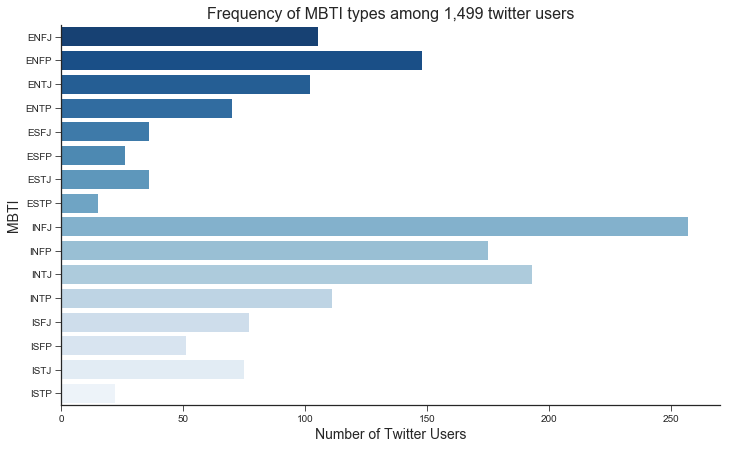

In [18]:
sns.set_style('whitegrid')
sns.set_style('ticks')
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.countplot(data=mbti_corpus, y='MBTI', color='magenta', palette="Blues_r",order=cols)
sns.despine()
plt.xlabel('Number of Twitter Users', fontsize=14)
plt.ylabel('MBTI', fontsize=14)
plt.title('Frequency of MBTI types among 1,499 twitter users', fontsize=16)
plt.show()

<h3>Introversion vs. Extroversion</h3>

In [19]:
table = pd.DataFrame(index=['I-E','N-S','T-F','J-P'],columns=['Total','Female','Male'])

In [20]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[0] == 'I']), len(mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'])]
label = ['General','Female','Male']
result = [0,1,2]

In [21]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [22]:
num_female = [len(female[female.MBTI.str[0] == 'I']), len(female[female.MBTI.str[0] == 'E'])]
num_male = [len(male[male.MBTI.str[0] == 'I']), len(male[male.MBTI.str[0] == 'E'])]

In [23]:
raw_data = {'Introverts': [i_e[0],num_female[0],num_male[0]],'Extroverts':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [24]:
totals = [i+k for i,k in zip(df['Introverts'],df['Extroverts'])]
introverts = [i*100/j for i,j in zip(df['Introverts'],totals)]
extroverts = [i*100/j for i,j in zip(df['Extroverts'],totals)]

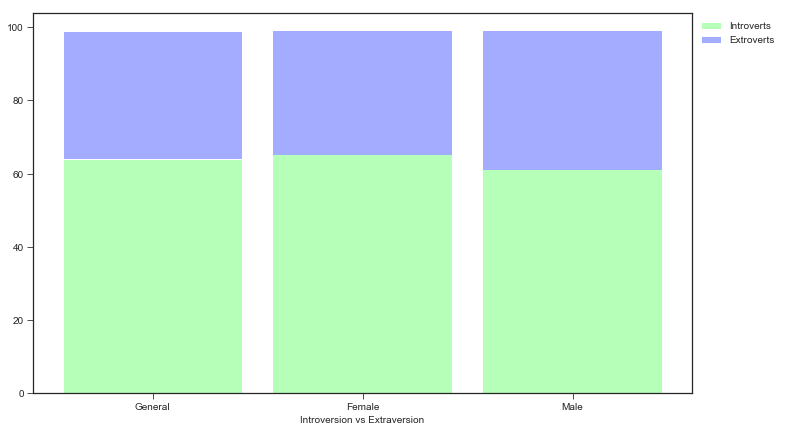

In [25]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, introverts, color='#b5ffb9',edgecolor='white',width=barWidth,label='Introverts')
plt.bar(result, extroverts, color='#a3acff',bottom=introverts,edgecolor='white',width=barWidth,label='Extroverts')
plt.xticks(result, label)
plt.xlabel('Introversion vs Extraversion')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [26]:
total = 1499
table['Total'][0] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][0] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][0] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

<h3>Intuition vs. Sensing</h3>

In [27]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[1] == 'N']), len(mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'])]
label = ['General','Female','Male']
result = [0,1,2]

In [28]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [29]:
num_female = [len(female[female.MBTI.str[1] == 'N']), len(female[female.MBTI.str[1] == 'S'])]
num_male = [len(male[male.MBTI.str[1] == 'N']), len(male[male.MBTI.str[1] == 'S'])]

In [30]:
raw_data = {'Intuitive': [i_e[0],num_female[0],num_male[0]],'Sensing':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [31]:
totals = [i+k for i,k in zip(df['Intuitive'],df['Sensing'])]
intuit = [i*100/j for i,j in zip(df['Intuitive'],totals)]
sense = [i*100/j for i,j in zip(df['Sensing'],totals)]

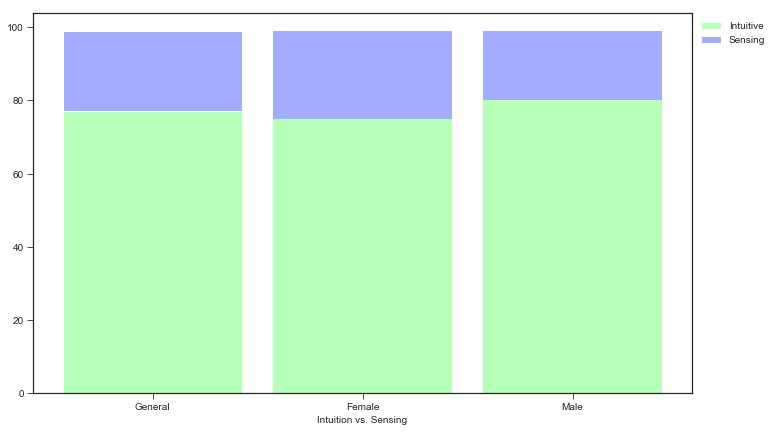

In [32]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, intuit, color='#b5ffb9',edgecolor='white',width=barWidth,label='Intuitive')
plt.bar(result, sense, color='#a3acff',bottom=intuit,edgecolor='white',width=barWidth,label='Sensing')
plt.xticks(result, label)
plt.xlabel('Intuition vs. Sensing')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [33]:
table['Total'][1] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][1] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][1] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

<h3>Thinking vs. Feeling</h3>

In [34]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[2] == 'T']), len(mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'])]
label = ['General','Female','Male']
result = [0,1,2]

In [35]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [36]:
num_female = [len(female[female.MBTI.str[2] == 'T']), len(female[female.MBTI.str[2] == 'F'])]
num_male = [len(male[male.MBTI.str[2] == 'T']), len(male[male.MBTI.str[2] == 'F'])]

In [37]:
raw_data = {'Thinking': [i_e[0],num_female[0],num_male[0]],'Feeling':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [38]:
totals = [i+k for i,k in zip(df['Thinking'],df['Feeling'])]
think = [i*100/j for i,j in zip(df['Thinking'],totals)]
feel = [i*100/j for i,j in zip(df['Feeling'],totals)]

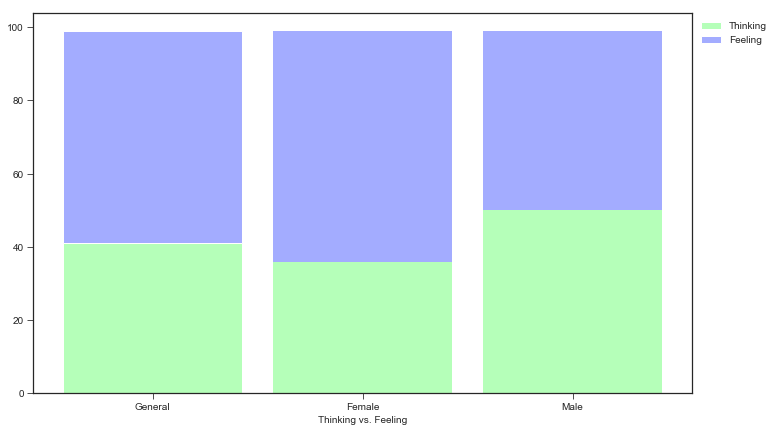

In [39]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, think, color='#b5ffb9',edgecolor='white',width=barWidth,label='Thinking')
plt.bar(result, feel, color='#a3acff',bottom=think,edgecolor='white',width=barWidth,label='Feeling')
plt.xticks(result, label)
plt.xlabel('Thinking vs. Feeling')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [40]:
table['Total'][2] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][2] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][2] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

<h3>Judging vs. Prospecting</h3>

In [41]:
i_e = [len(mbti_corpus[mbti_corpus.MBTI.str[3] == 'J']), len(mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'])]
label = ['General','Female','Male']
result = [0,1,2]

In [42]:
female = mbti_corpus[mbti_corpus.Gender == 'f']
male = mbti_corpus[mbti_corpus.Gender == 'm']

In [43]:
num_female = [len(female[female.MBTI.str[3] == 'J']), len(female[female.MBTI.str[3] == 'P'])]
num_male = [len(male[male.MBTI.str[3] == 'J']), len(male[male.MBTI.str[3] == 'P'])]

In [44]:
raw_data = {'Judging': [i_e[0],num_female[0],num_male[0]],'Prospecting':[i_e[1],num_female[1],num_male[1]]}
df = pd.DataFrame(raw_data)

In [45]:
totals = [i+k for i,k in zip(df['Judging'],df['Prospecting'])]
judge = [i*100/j for i,j in zip(df['Judging'],totals)]
prospect = [i*100/j for i,j in zip(df['Prospecting'],totals)]

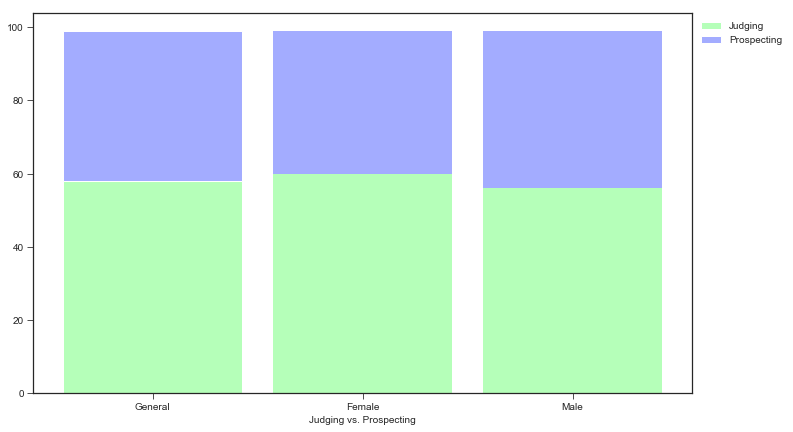

In [46]:
barWidth = 0.85
plt.figure(figsize=(11.8, 7))
plt.bar(result, judge, color='#b5ffb9',edgecolor='white',width=barWidth,label='Judging')
plt.bar(result, prospect, color='#a3acff',bottom=judge,edgecolor='white',width=barWidth,label='Prospecting')
plt.xticks(result, label)
plt.xlabel('Judging vs. Prospecting')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()

In [47]:
table['Total'][3] = str(i_e[0]*100/total) + '% / ' + str(i_e[1]*100/total) + '%'
table['Female'][3] = str(num_female[0]*100/len(female)) + '% / ' + str(num_female[1]*100/len(female)) + '%'
table['Male'][3] = str(num_male[0]*100/len(male)) + '% / ' + str(num_male[1]*100/len(male)) + '%'

In [48]:
table

,Total,Female,Male
I-E,64% / 35%,65% / 34%,61% / 38%
N-S,77% / 22%,75% / 24%,80% / 19%
T-F,41% / 58%,36% / 63%,50% / 49%
J-P,58% / 41%,60% / 39%,56% / 43%


<h3>Followers Count</h3>

<h4>Number of followers with respect to MBTI</h4>

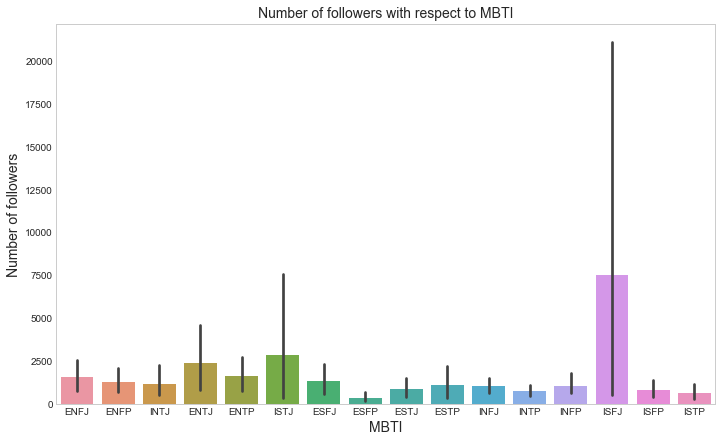

In [51]:
plt.figure(figsize=(11.8, 7))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='followers_count', data=mbti_corpus)
plt.title('Number of followers with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of followers', fontsize=14)
plt.show()

<h4>Number of followers by Gender</h4>

In [57]:
female_followers = mbti_corpus[mbti_corpus.Gender == 'f'].followers_count
male_followers = mbti_corpus[mbti_corpus.Gender == 'm'].followers_count

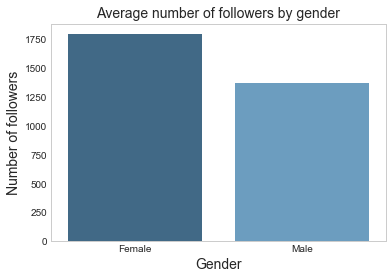

In [65]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_followers), np.mean(male_followers)], palette="Blues_d")
plt.title('Average number of followers by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of followers', fontsize=14)
plt.show()

<h4>Number of followers by Personality Traits</h4>

In [66]:
introverts_followers = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].followers_count
extroverts_followers = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].followers_count
intuit_followers = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].followers_count
sense_followers = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].followers_count
think_followers = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].followers_count
feel_followers = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].followers_count
judge_followers = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].followers_count
prospect_followers = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].followers_count

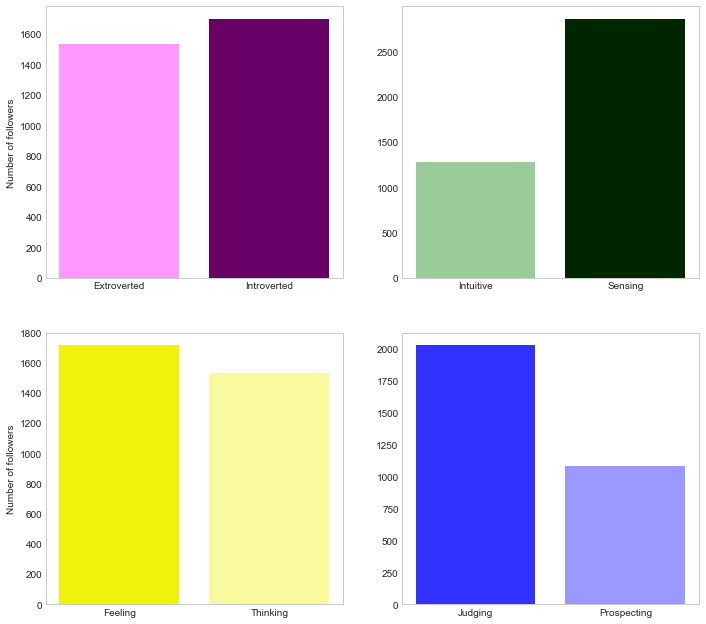

In [97]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_followers),np.mean(extroverts_followers)], color=['#660066','#ff99ff'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_followers),np.mean(sense_followers)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_followers),np.mean(feel_followers)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_followers),np.mean(prospect_followers)], color=['#3232ff','#9999ff'])
ax1.set_ylabel('Number of followers')
ax3.set_ylabel('Number of followers')
plt.show()

<h3>Statuses count</h3>

<h4>Number of statuses with respect to MBTI</h4>

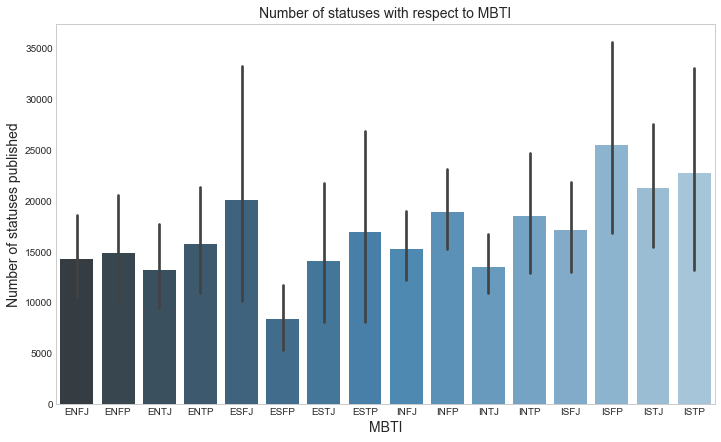

In [112]:
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='statuses_count', data=mbti_corpus,order=cols,palette="Blues_d")
plt.title('Number of statuses with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of statuses published', fontsize=14)
plt.show()

<h4>Number of statuses published by Gender</h4>

In [107]:
female_status = mbti_corpus[mbti_corpus.Gender == 'f'].statuses_count
male_status = mbti_corpus[mbti_corpus.Gender == 'm'].statuses_count

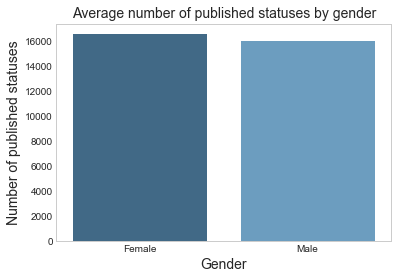

In [108]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_status), np.mean(male_status)], palette="Blues_d")
plt.title('Average number of published statuses by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of published statuses', fontsize=14)
plt.show()

<h4>Number of statuses published by personality traits</h4>

In [109]:
introverts_status = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].statuses_count
extroverts_status = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].statuses_count
intuit_status = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].statuses_count
sense_status = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].statuses_count
think_status = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].statuses_count
feel_status = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].statuses_count
judge_status = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].statuses_count
prospect_status = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].statuses_count

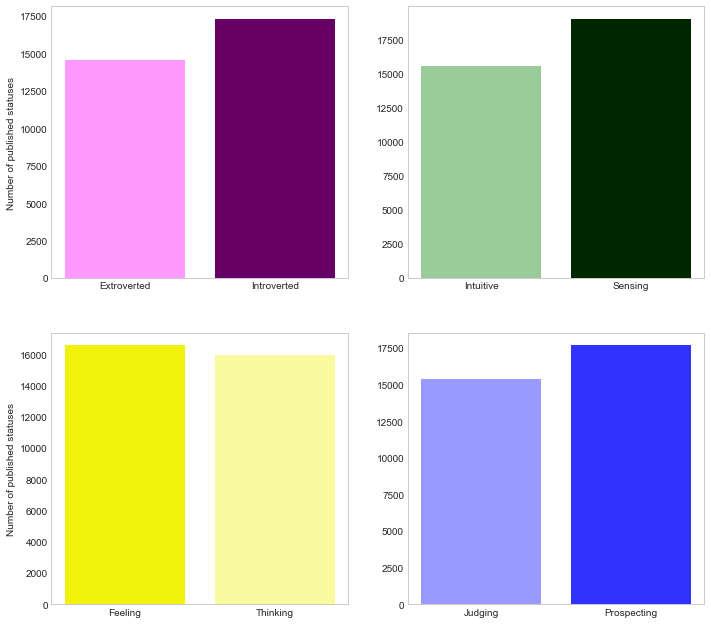

In [117]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_status),np.mean(extroverts_status)], color=['#660066','#ff99ff'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_status),np.mean(sense_status)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_status),np.mean(feel_status)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_status),np.mean(prospect_status)], color=['#9999ff','#3232ff'])
ax1.set_ylabel('Number of published statuses')
ax3.set_ylabel('Number of published statuses')
plt.show()

<h3>Favorites Count</h3>

<h4>Favorites count with respect to MBTI</h4>

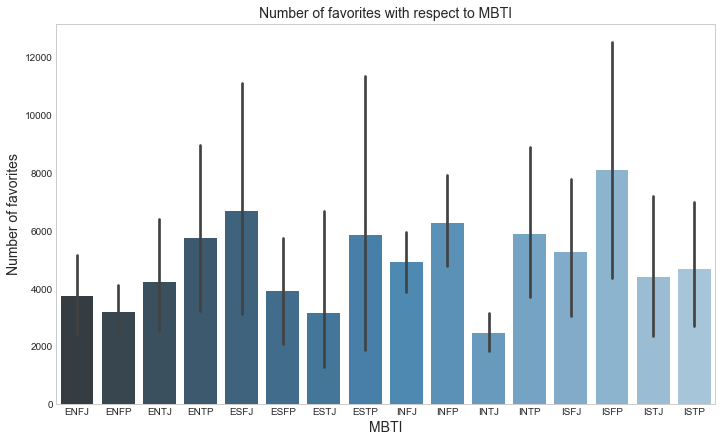

In [111]:
plt.figure(figsize=(11.8, 7))
cols = sorted(pd.unique(mbti_corpus.MBTI))
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x='MBTI', y='favorites_count', data=mbti_corpus,order=cols,palette="Blues_d")
plt.title('Number of favorites with respect to MBTI', fontsize=14)
plt.xlabel('MBTI', fontsize=14)
plt.ylabel('Number of favorites', fontsize=14)
plt.show()

<h4>Number of favorites by Gender</h4>

In [113]:
female_fav = mbti_corpus[mbti_corpus.Gender == 'f'].favorites_count
male_fav = mbti_corpus[mbti_corpus.Gender == 'm'].favorites_count

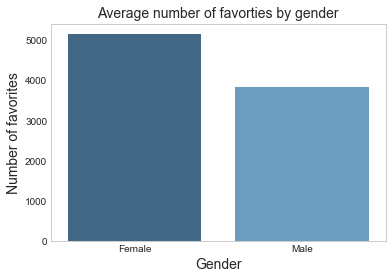

In [114]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.barplot(x=['Female','Male'], y=[np.mean(female_fav), np.mean(male_fav)], palette="Blues_d")
plt.title('Average number of favorties by gender', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of favorites', fontsize=14)
plt.show()

<h4>Number of favorites by personality traits</h4>

In [115]:
introverts_fav = mbti_corpus[mbti_corpus.MBTI.str[0] == 'I'].favorites_count
extroverts_fav = mbti_corpus[mbti_corpus.MBTI.str[0] == 'E'].favorites_count
intuit_fav = mbti_corpus[mbti_corpus.MBTI.str[1] == 'N'].favorites_count
sense_fav = mbti_corpus[mbti_corpus.MBTI.str[1] == 'S'].favorites_count
think_fav = mbti_corpus[mbti_corpus.MBTI.str[2] == 'T'].favorites_count
feel_fav = mbti_corpus[mbti_corpus.MBTI.str[2] == 'F'].favorites_count
judge_fav = mbti_corpus[mbti_corpus.MBTI.str[3] == 'J'].favorites_count
prospect_fav = mbti_corpus[mbti_corpus.MBTI.str[3] == 'P'].favorites_count

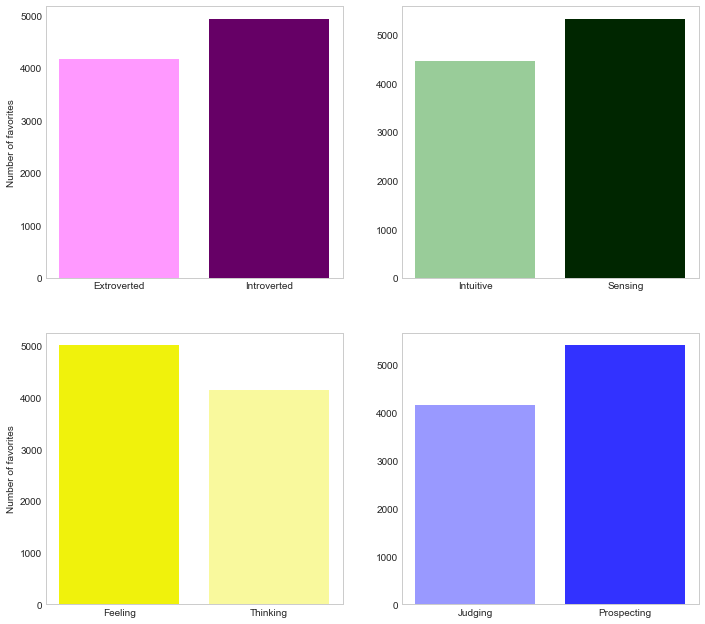

In [119]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(11.7, 11))
ax1.bar(x=['Introverted','Extroverted'], height=[np.mean(introverts_fav),np.mean(extroverts_fav)], color=['#660066','#ff99ff'])
ax2.bar(x=['Intuitive','Sensing'], height=[np.mean(intuit_fav),np.mean(sense_fav)], color=['#99cc99','#002600'])
ax3.bar(x=['Thinking','Feeling'], height=[np.mean(think_fav),np.mean(feel_fav)], color=['#f9f99d','#f0f20c'])
ax4.bar(x=['Judging','Prospecting'],height=[np.mean(judge_fav),np.mean(prospect_fav)], color=['#9999ff','#3232ff'])
ax1.set_ylabel('Number of favorites')
ax3.set_ylabel('Number of favorites')
plt.show()